In [46]:
# Network Data Science 
import networkx as nx

# Data Wrangling
import numpy as np
import pandas as pd

# Network Data Analysis 
import networkx as nx
import geonetworkx as gnx

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patheffects as path_effects
from mpl_toolkits.mplot3d.art3d import Line3DCollection
%pylab inline

# Geo-Spatial Data Analysis
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point

# Other Utilities
from operator import itemgetter
from collections import defaultdict

# Custom Modules
import digital_epidemiology as depi

# Reload Custom Modules
from importlib import reload
depi = reload(depi)

Populating the interactive namespace from numpy and matplotlib


## Data Collection 

In [40]:
# Set geodata file path
regions = "/Users/pietromonticone/github/DigitalEpidemiologyProject/Data/Shape/Reg01012020/Reg01012020_WGS84.shp"
provinces = "/Users/pietromonticone/github/DigitalEpidemiologyProject/Data/Shape/ProvCM01012020/ProvCM01012020_WGS84.shp"
macro_regions = "/Users/pietromonticone/github/DigitalEpidemiologyProject/Data/Shape/RipGeo01012020/RipGeo01012020_WGS84.shp"
municipalities = "/Users/pietromonticone/github/DigitalEpidemiologyProject/Data/Shape/Com01012020/Com01012020_WGS84.shp"

# Set demodata file path
regional_demographics = "/Users/pietromonticone/github/DigitalEpidemiologyProject/Data/CSV/RegionalDemographics.csv"
provincial_demographics = "/Users/pietromonticone/github/DigitalEpidemiologyProject/Data/CSV/ProvincialDemographics.csv"
municipal_demographics = "/Users/pietromonticone/github/DigitalEpidemiologyProject/Data/CSV/MunicipalDemographics.csv"

#macroregional_data = gpd.read_file(italy_macroregions)
#macroregional_data.plot(figsize=(10, 10)).set_axis_off()

## Regional Level

### Data Manipulation 

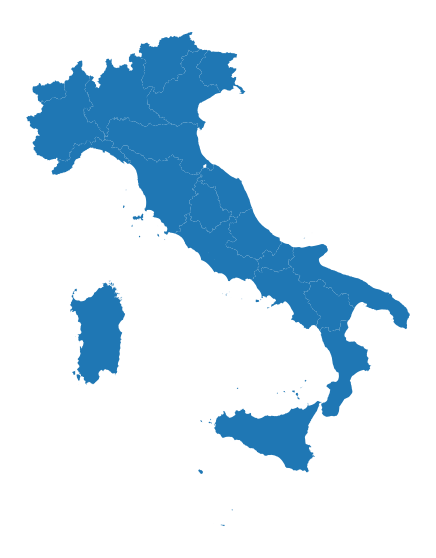

In [41]:
# Store data
regional_data = gpd.read_file(regions)
regional_demo_data = pd.read_csv(regional_demographics)

# Fill column of neighbors 
depi.expand(data=regional_data, level="regional", demo = regional_demo_data)
    
# Visualize GeoDataFrame
regional_data.plot(figsize=(10, 10)).set_axis_off()

### Graph Data Manipulation  

In [42]:
# Build the regional undirected graph
regional_graph = depi.build_graph(data = regional_data,
                                  level = "regional",
                                  graph = nx.Graph())

### Graph Data Visualization 

CONNECTIVITY:
• 20 nodes;
• 31 edges.


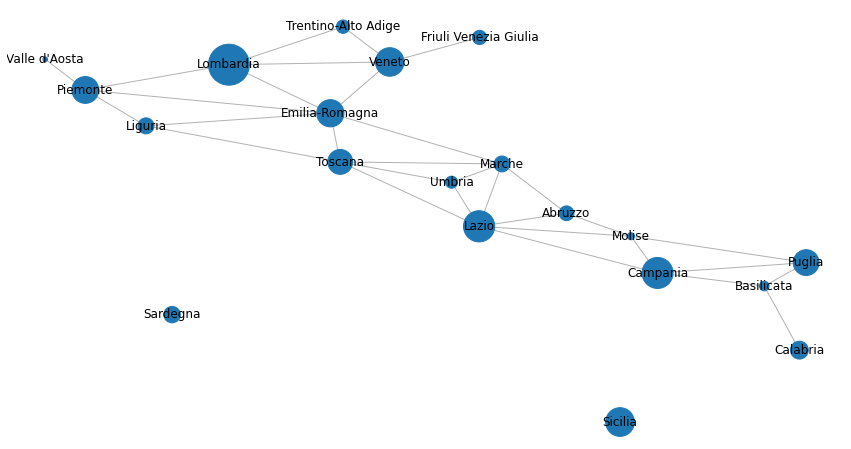

In [87]:
# Showcase connectivity
print("CONNECTIVITY:\n•",regional_graph.number_of_nodes(),"nodes;\n•",regional_graph.number_of_edges(),"edges.")

regional_pop_list = [regional_graph.pop[i] for i in list(regional_graph.nodes)]
regional_pop_list = regional_pop_list/sum(regional_pop_list)
regional_pop_list = [10000*pop for pop in regional_pop_list]


# Visualize graph 
fig=plt.figure(figsize=(15,8))
nx.draw_networkx_nodes(regional_graph, pos=regional_graph.pos,node_size=regional_pop_list)
nx.draw_networkx_edges(regional_graph, pos=regional_graph.pos, alpha=0.3) 
nx.draw_networkx_labels(regional_graph, pos=regional_graph.pos)
plt.axis('off')
plt.show()

## Provincial Level

### Data Manipulation 

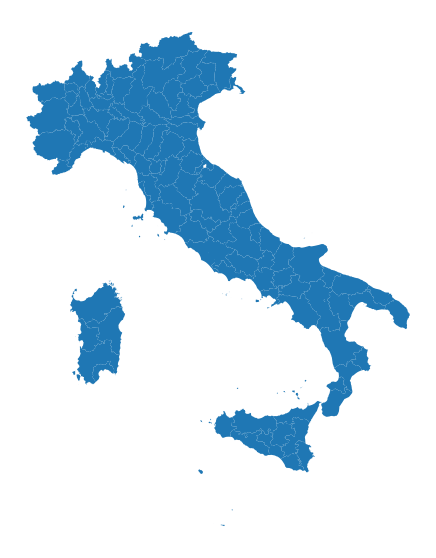

In [44]:
# Store data
provincial_data = gpd.read_file(provinces)
provincial_demo_data = pd.read_csv(provincial_demographics)

# Fill column of neighbors 
depi.expand(data=provincial_data, level="provincial", demo = provincial_demo_data)
    
# Visualize GeoDataFrame
provincial_data.plot(figsize=(10, 10)).set_axis_off()

### Graph Data Manipulation 

In [47]:
# Build the regional undirected graph
provincial_graph = depi.build_graph(data = provincial_data,
                                  level = "provincial",
                                  graph = nx.Graph())

### Graph Data Visualization 

CONNECTIVITY:
• 107 nodes;
• 238 edges.


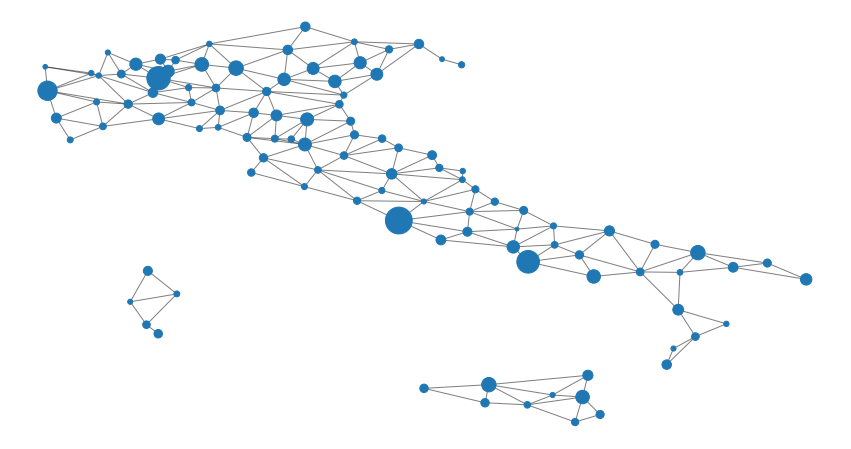

In [85]:
# Showcase connectivity
print("CONNECTIVITY:\n•",provincial_graph.number_of_nodes(),"nodes;\n•",provincial_graph.number_of_edges(),"edges.")

provincial_pop_list = [provincial_graph.pop[i] for i in list(provincial_graph.nodes)]
provincial_pop_list = provincial_pop_list/sum(provincial_pop_list)
provincial_pop_list = [10000*pop for pop in provincial_pop_list]

# Visualize Graph
fig=plt.figure(figsize=(15,8))
nx.draw_networkx_nodes(provincial_graph, pos=provincial_graph.pos,node_size=provincial_pop_list)
nx.draw_networkx_edges(provincial_graph,pos=provincial_graph.pos, alpha = 0.5)
#nx.draw_networkx_labels(H, pos=H.pos)
plt.axis('off')
plt.show()

In [127]:
cols = ['steelblue', 'darksalmon']#,'mediumseagreen']
np.random.seed(1)
graphs = [provincial_graph, regional_graph]

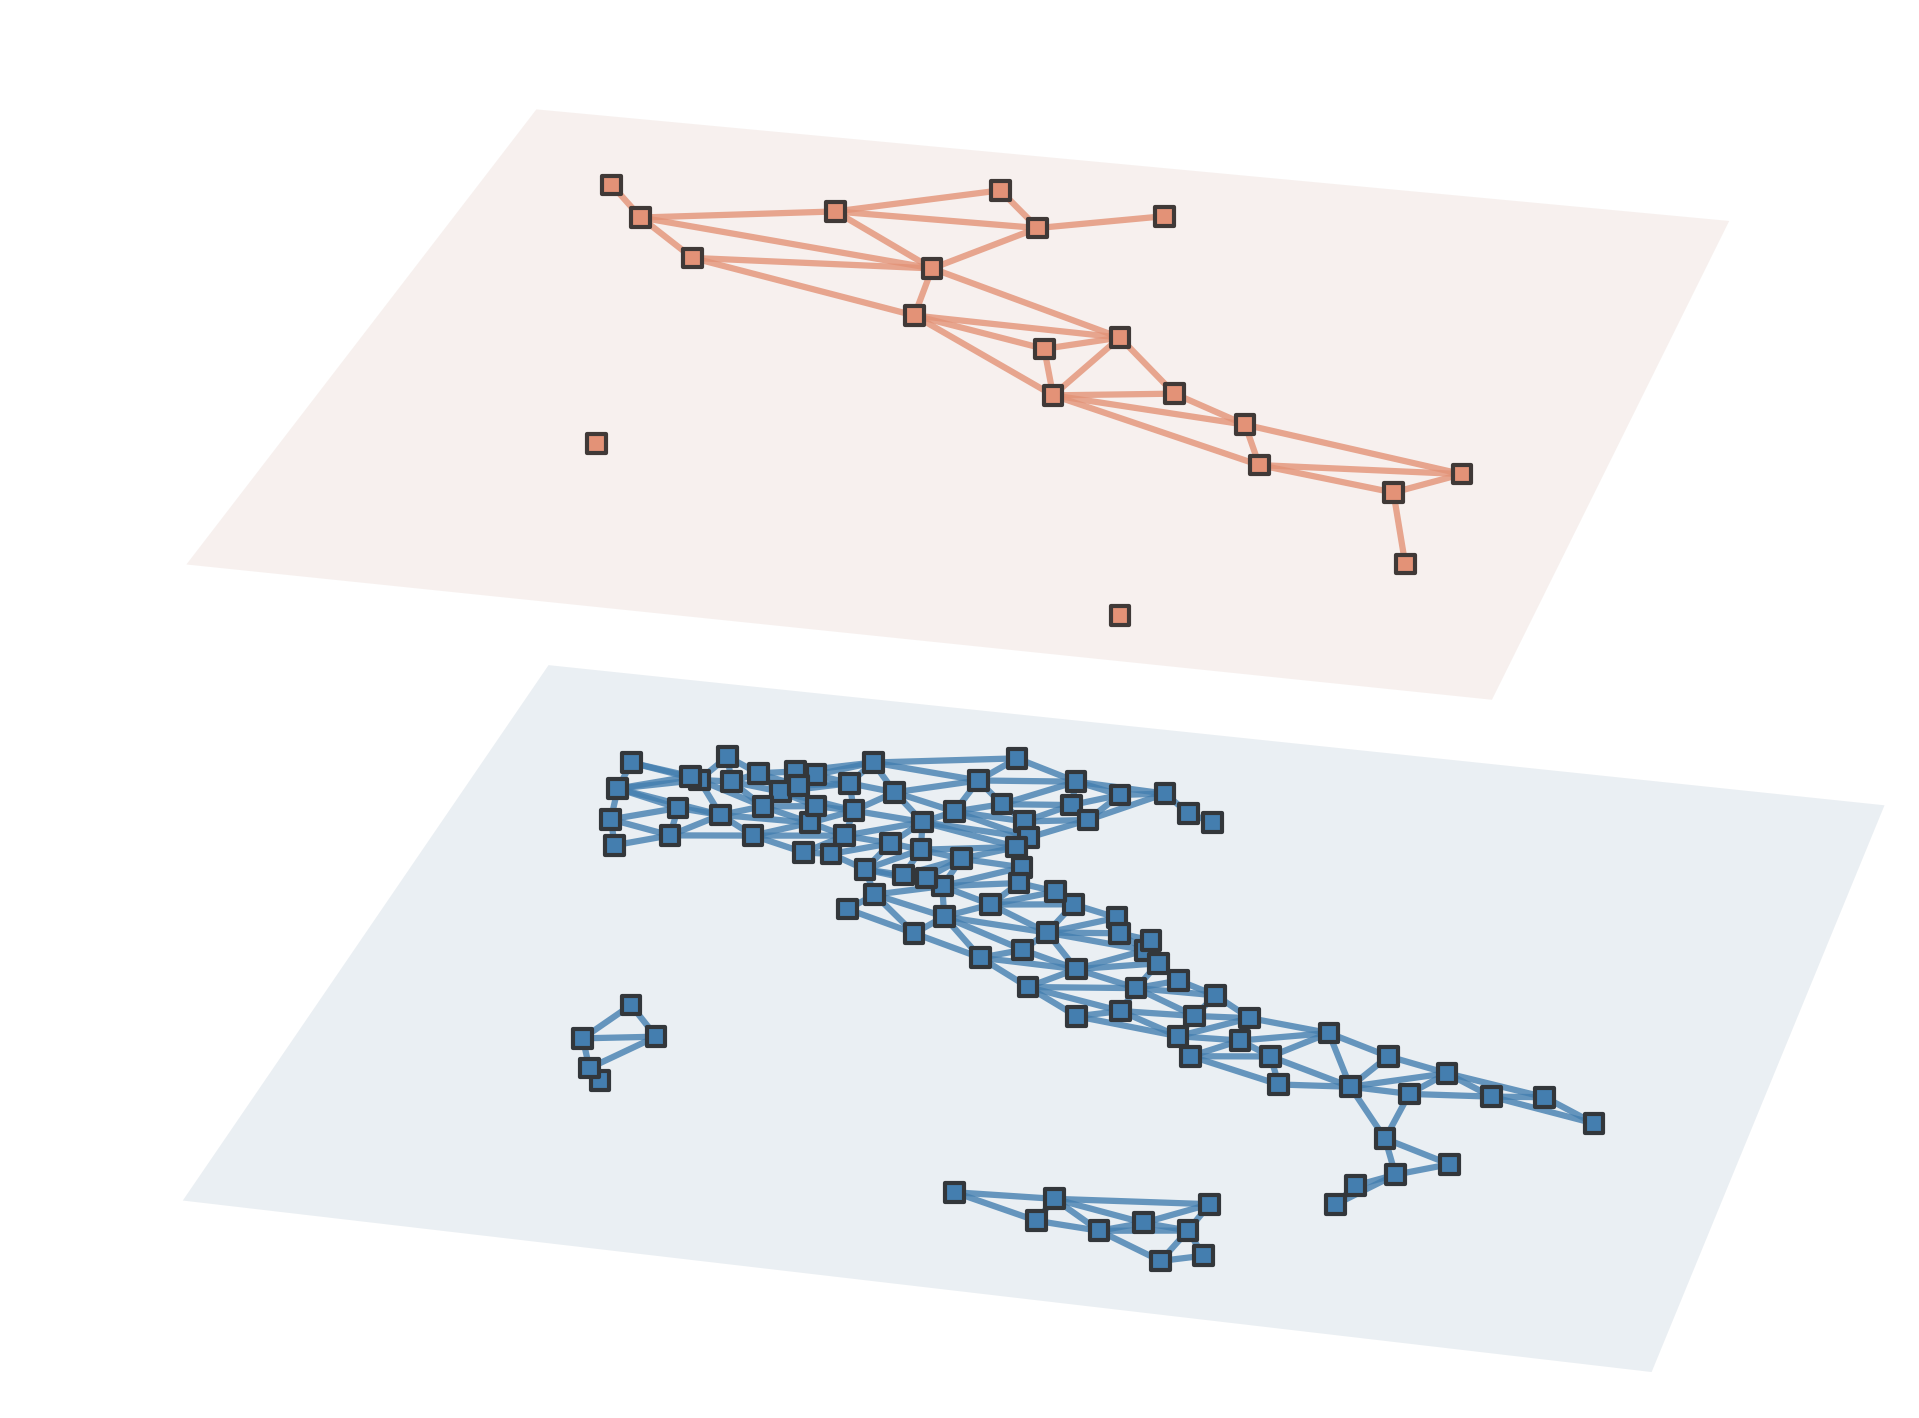

In [128]:
w = 8
h = 6

fig, ax = plt.subplots(1, 1, figsize=(w,h), dpi=300, subplot_kw={'projection':'3d'})

for gi, G in enumerate(graphs):
    pos = {}
    if gi == 0: 
        pos = provincial_graph.pos 
    elif gi == 1: 
        pos = regional_graph.pos 
        
    # node positions
    xs = list(list(zip(*list(pos.values())))[0])
    ys = list(list(zip(*list(pos.values())))[1])
    zs = [gi]*len(xs) # set a common z-position of the nodes 

    # node colors
    cs = [cols[gi]]*len(xs)
    
    # add intra-layer edges 
    lines3d = [(list(pos[i])+[gi],list(pos[j])+[gi]) for i,j in G.edges()]
    line_collection = Line3DCollection(lines3d, zorder=gi, color=cols[gi], alpha=0.8)
    ax.add_collection3d(line_collection)
    
    # now add nodes
    ax.scatter(xs, ys, zs, c=cs, edgecolors='.2', marker='s', alpha=1, zorder=gi)
    
    # add a plane to designate the layer
    xdiff = max(xs)-min(xs)
    ydiff = max(ys)-min(ys)
    ymin = min(ys)-ydiff*0.1
    ymax = max(ys)+ydiff*0.1
    xmin = min(xs)-xdiff*0.1 * (w/h)
    xmax = max(xs)+xdiff*0.1 * (w/h)
    xx, yy = np.meshgrid([xmin, xmax],[ymin, ymax])
    zz = np.zeros(xx.shape)+gi
    ax.plot_surface(xx, yy, zz, color=cols[gi], alpha=0.1, zorder=gi)

    # add label
    layertext = ax.text(0.0, 1.15, gi*0.95+0.5, "Layer %i"%(gi+1),
                        color='.95', fontsize='large', zorder=1e5)
    # make the text 
    layertext.set_path_effects([path_effects.Stroke(linewidth=2, foreground=cols[gi]),
                                path_effects.Normal()])

# set them all at the same x,y,zlims
ax.set_ylim(min(ys)-ydiff*0.1,max(ys)+ydiff*0.1)
ax.set_xlim(min(xs)-xdiff*0.1,max(xs)+xdiff*0.1)
ax.set_zlim(-0.1, len(graphs) - 1 + 0.1)

# select viewing angle
angle = -76
height_angle = 35
ax.view_init(height_angle, angle)

# how much do you want to zoom into the fig
ax.dist = 8.5

ax.set_axis_off()

#plt.savefig('multilayer_network.png',dpi=425,bbox_inches='tight')
plt.show()